<a href="https://colab.research.google.com/github/yuliiabosher/Python-with-Data-course/blob/main/Worksheets/Data_Exploration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring data sets
---

This [link](https://docs.google.com/document/d/1cijDOCDixsYu-Rr9pC8STPPXado3xoFpgBAZgdDTLHs/edit?usp=sharing) will take you to a list of some of the datasets we use during the Programming for Data course.

For this exercise, please choose a dataset to work with.

Use the code cell below to play with the data.  Look at what data is included, where there is any null data, if there are any columns that need renaming, removing, new values calculated from them.

Form some ideas of what you might want to know from the data and use the techniques you have learned so far to show the answers to these.  You might do this by getting summary statistics, by sorting and showing parts of the dataset, by calculating new values, etc.

### What to do
---

Decide what you want to know, explain this in the TEXT cell below, then write some code to get the answer.  When you have done this, add a new text cell below the code cell, explain what you have found.  Then do the same again, adding text cell, code cell, text cell, for something else you would like to know.

In [20]:
!pip install odfpy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter







In [23]:
df = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179047/Ukraine_sponsorship_scheme_-_visa_data_15_August_2023.ods", sheet_name = 'LTLA_-_England', skiprows=8)
df = df.drop(df.iloc[310:].index, axis=0)
df = df.drop(0, axis=0)
df['Country'] = 'England'
df = df.rename(columns={'Lower tier local authority name': 'Local authority name'})
df = df.rename(columns={'LTLA - ONS code': 'ONS code'})
df['Scheme type'] = 'Sponsored by a member of the public'
df2 = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179047/Ukraine_sponsorship_scheme_-_visa_data_15_August_2023.ods", sheet_name = 'Scotland', skiprows=10)
df2 = df2.drop(0, axis=0)
df2['Country'] = 'Scotland'
df2 = df2.drop(df2.loc[33:37].index, axis=0)
df2 = df2.drop(df2.loc[39:].index, axis=0)
df2 = df2.rename(columns={'Upper tier local authority name': 'Local authority name'})
df2['Scheme type'] = 'Sponsored by a member of the public'
df2['Scheme type'][38] ='Sponsored by a devolved government'
df3 = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179047/Ukraine_sponsorship_scheme_-_visa_data_15_August_2023.ods", sheet_name = 'Wales', skiprows=10)
df3 = df3.drop(0, axis=0)
df3 = df3.drop(df3.loc[22:27].index, axis=0)
df3 = df3.drop(df3.loc[29:].index, axis=0)
df3['Country'] = 'Wales'
df3 = df3.rename(columns={'Upper tier local authority name': 'Local authority name'})
df3['Scheme type'] = 'Sponsored by a member of the public'
df3['Scheme type'][28] = 'Sponsored by a devolved government'
df4 = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179047/Ukraine_sponsorship_scheme_-_visa_data_15_August_2023.ods", sheet_name = 'Northern_Ireland', skiprows=8)
df4 = df4.drop(0, axis=0)
df4 = df4.drop(df4.loc[12:].index, axis=0)
df4['Country'] = 'Northern Ireland'
df4 = df4.rename(columns={'Numbers of visa applications': 'Number of visa applications'})
df4['Scheme type'] = 'Sponsored by a member of the public'
uk = pd.concat([df, df2, df3, df4], ignore_index=True)
def asterisk(x):
  if x == '*':
    return 0
  else:
    return x

uk['Number of arrivals in the UK by sponsor location'] = uk['Number of arrivals in the UK by sponsor location'].apply(asterisk)
uk['Number of visas issued'] = uk['Number of visas issued'].apply(asterisk)
uk['Number of visa applications'] = uk['Number of visa applications'].apply(asterisk)
uk['Number of visa applications'] = uk['Number of visa applications'].astype(int)
uk['Number of visas issued'] = uk['Number of visas issued'].astype(int)
uk['Number of arrivals in the UK by sponsor location'] = uk['Number of arrivals in the UK by sponsor location'].astype(int)
uk = uk.rename(columns = {'Number of visa applications': 'Applications', 'Number of visas issued': 'Visas', 'Number of arrivals in the UK by sponsor location': 'Arrivals'})
family = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179577/ukraine-visa-schemes-summary-jun-2023-tables.ods", sheet_name = "UVS_03", skiprows=1)
family = family.drop(family.iloc[69:].index, axis=0)
def less_50(x):
  if x['Ukraine Family Scheme Arrivals'] == 'Less than 50':
    return 50
  else:
    return x['Ukraine Family Scheme Arrivals']
family['Ukraine Family Scheme Arrivals'] = family.apply(less_50, axis=1)
def z(x):
  if x['Ukraine Sponsorship Scheme Arrivals'] == 'z':
    return 0
  else:
    return x['Ukraine Sponsorship Scheme Arrivals']
family['Ukraine Sponsorship Scheme Arrivals'] = family.apply(z, axis=1)
def total(x):
  if x['Total Arrivals'] == 'Less than 50':
    return 50
  else:
    return x['Total Arrivals']
family['Total Arrivals'] = family.apply(total, axis=1)
family['Week Ending'] = pd.to_datetime(family['Week Ending'])
family_scheme_total = family['Ukraine Family Scheme Arrivals'].sum()
new_row = ['n/a', None, 'n/a', 'n/a', family_scheme_total, None, 'Sponsored by a family member']
uk.loc[len(uk)] = new_row
total_arrivals = family['Total Arrivals']
week = family['Week Ending']

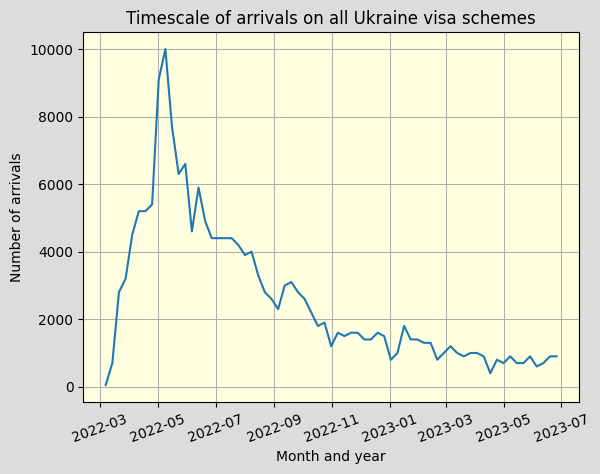

In [169]:
fig, axs = plt.subplots(facecolor='gainsboro')
plt.plot(week, total_arrivals)
plt.xticks(rotation = 20)
plt.title('Timescale of arrivals on all Ukraine visa schemes')
plt.xlabel('Month and year')
plt.ylabel('Number of arrivals')
plt.grid()
axs.set_facecolor('lightyellow')



Text(0.5, 1.0, 'Arrivals from Ukraine by visa scheme')

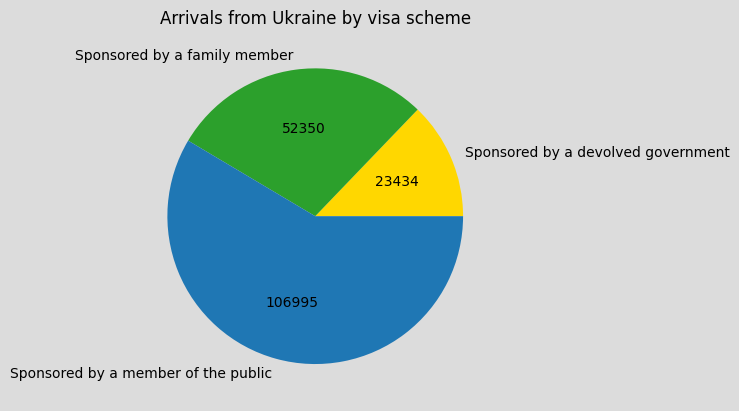

In [160]:
scheme_total = uk.groupby('Scheme type').sum(numeric_only = True).sort_values('Arrivals')
data_scheme = scheme_total['Arrivals']
labels_scheme = data_scheme.keys()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{v}'.format(v=val)
        return my_format
fig, axs = plt.subplots(facecolor='gainsboro')
plt.pie(data_scheme, labels = labels_scheme, autopct = autopct_format(data_scheme), colors=['gold', 'tab:green', 'tab:blue'])
plt.title("Arrivals from Ukraine by visa scheme")


Text(0.5, 1.0, 'Sex breakdown of working age arrivals from Ukraine on all schemes')

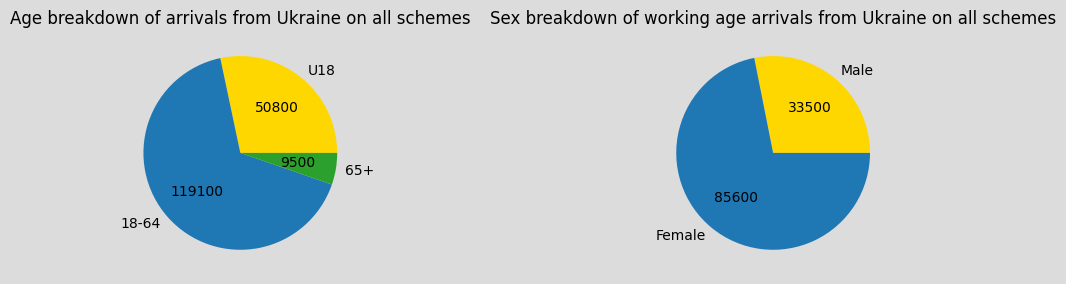

In [159]:
demographic = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179577/ukraine-visa-schemes-summary-jun-2023-tables.ods", sheet_name= 'UVS_04')
demographic=demographic.rename(columns={'UVS_04: Demographic (age/sex) breakdown for those arriving on Ukraine Schemes as at 30 June 2023 [Note 1]': 'Age/sex breakdown', 'Unnamed: 1': 'U18', 'Unnamed: 2': '18-64', 'Unnamed: 3': '65+'})
demographic=demographic.drop(demographic.loc[1:6].index)
demographic=demographic.drop(demographic.loc[9:].index)
demographic=demographic.drop('Unnamed: 4', axis=1)
demographic['U18'][7] = 25700
demographic['U18'][8] = 25100
demographic['18-64'][7] = 33500
demographic['18-64'][8] = 85600
demographic['65+'][7] = 3000
demographic['65+'][8] = 6500
age = demographic.T
age = age.rename(columns={0: 'Age group'})
age = age.drop('Age/sex breakdown', axis=0)
age['Arrivals'] = age[7] + age[8]
age = age.drop(7, axis=1)
age = age.drop(8, axis=1)
age_data = age['Arrivals']
age_labels = age['Age group']
fig, axs = plt.subplots(1, 2, figsize=(10,10), facecolor='gainsboro')
fig.subplots_adjust(wspace=1.2)
axs[0].pie(age_data, labels = age_labels, autopct = autopct_format(age_data), colors=['gold', 'tab:blue', 'tab:green'])
axs[0].set_title('Age breakdown of arrivals from Ukraine on all schemes')
sex = demographic.T
sex = sex.rename(columns={7: 'Male', 8: 'Female'})
sex = sex.drop('Age/sex breakdown', axis=0)
sex = sex.drop(0, axis=1)
sex_data = sex.loc['18-64']
sex_labels = sex.loc['18-64'].keys()
axs[1].pie(sex_data, labels=sex_labels, autopct = autopct_format(sex_data), colors=['gold', 'tab:blue'])
axs[1].set_title('Sex breakdown of working age arrivals from Ukraine on all schemes')


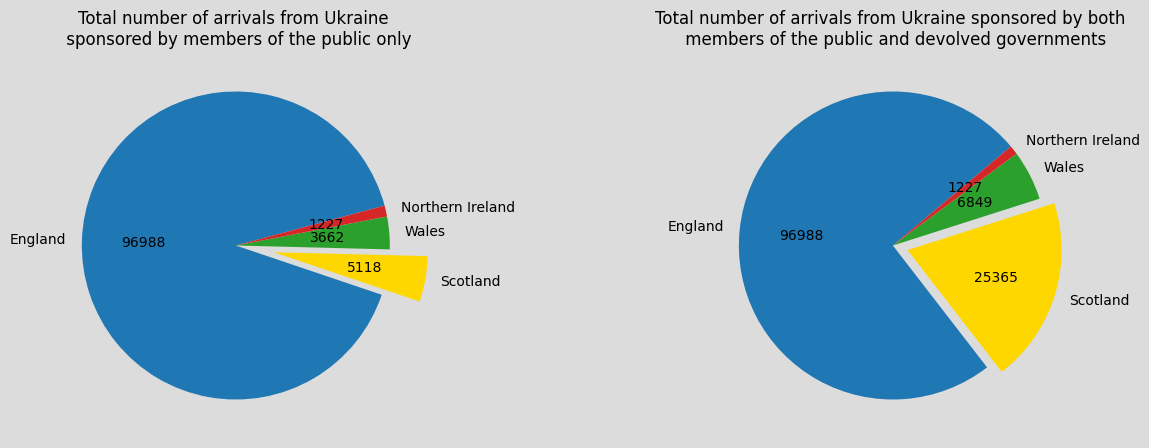

In [161]:
members_of_public = uk.dropna(subset = 'ONS code')
public_gov = uk.dropna(subset='Country')
public_gov_grouped = public_gov.groupby('Country').sum(numeric_only=False).sort_values('Arrivals', ascending=False)
data_public_gov = public_gov_grouped['Arrivals']
labels_public_gov = public_gov_grouped['Arrivals'].keys()
public = members_of_public.groupby('Country').sum(numeric_only=False).sort_values('Arrivals', ascending=False)
public_data = public['Arrivals']
public_labels = public['Arrivals'].keys()
fig, axs = plt.subplots(1,2, figsize=(15,5), facecolor='gainsboro')
fig.subplots_adjust(wspace=0.3)
axs[1].pie(data_public_gov, labels=labels_public_gov, autopct = autopct_format(data_public_gov), explode = [0, 0.1, 0, 0], startangle=40, colors=['tab:blue', 'gold', 'tab:green', 'tab:red'])
axs[1].set_title('Total number of arrivals from Ukraine sponsored by both \n members of the public and devolved governments')
axs[0].pie(public_data, labels=public_labels, autopct = autopct_format(public_data), explode = [0, 0.25, 0, 0], startangle=15, colors=['tab:blue', 'gold', 'tab:green', 'tab:red'])
axs[0].set_title('Total number of arrivals from Ukraine \n sponsored by members of the public only')
plt.show()



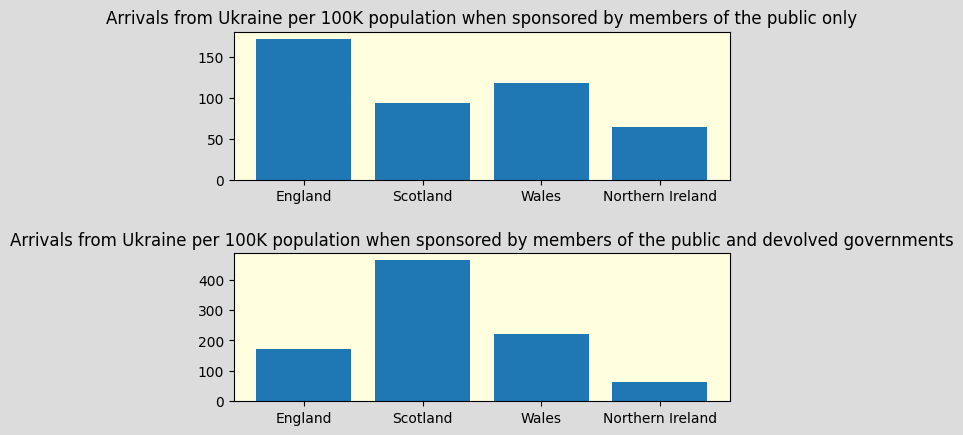

In [162]:
population = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/ukpopestimatesmid2021on2021geographyfinal.xls', sheet_name = 'MYE1')
population = population.drop('Unnamed: 1', axis=1)
population = population.drop('MYE1: Population estimates: Summary for the UK, mid-2021', axis=1)
population = population.drop('Unnamed: 2', axis=1)
population = population.drop('Unnamed: 3', axis=1)
population.columns = population.iloc[5]
population = population.drop(population.loc[:6].index, axis=0)
population = population.drop(population.loc[8:].index, axis=0)
country_total = uk.groupby('Country').sum(numeric_only = False).sort_values("Arrivals")
country_per_100K = {
    'England': [round(country_total['Arrivals']['England']/population['England'][7]*100000)],
    'Scotland':[round(country_total['Arrivals']['Scotland']/population['Scotland'][7]*100000)],
    'Wales': [round(country_total['Arrivals']['Wales']/population['Wales '][7]*100000)],
    'Northern Ireland': [round(country_total['Arrivals']['Northern Ireland']/population['Northern Ireland '][7]*100000)]
}
country_per_100K
country_100K_df = pd.DataFrame(country_per_100K)
pm_country_total = members_of_public.groupby('Country').sum(numeric_only=True)
pm_country_100K = {
    'England': [round(pm_country_total['Arrivals']['England']/population['England'][7]*100000)],
    'Scotland': [round(pm_country_total['Arrivals']['Scotland']/population['Scotland'][7]*100000)],
    'Wales': [round(pm_country_total['Arrivals']['Wales']/population['Wales '][7]*100000)],
    'Northern Ireland': [round(pm_country_total['Arrivals']['Northern Ireland']/population['Northern Ireland '][7]*100000)]
}
pm_country_100K_df = pd.DataFrame(pm_country_100K)
fig, axs = plt.subplots(2, facecolor='gainsboro')
axs[0].bar(pm_country_100K_df.keys(), pm_country_100K_df.iloc[0])
axs[0].set_title('Arrivals from Ukraine per 100K population when sponsored by members of the public only')
axs[0].set_facecolor('lightyellow')
axs[1].bar(country_100K_df.keys(), country_100K_df.iloc[0])
axs[1].set_title('Arrivals from Ukraine per 100K population when sponsored by members of the public and devolved governments')
axs[1].set_facecolor('lightyellow')
fig.subplots_adjust(hspace=0.5)


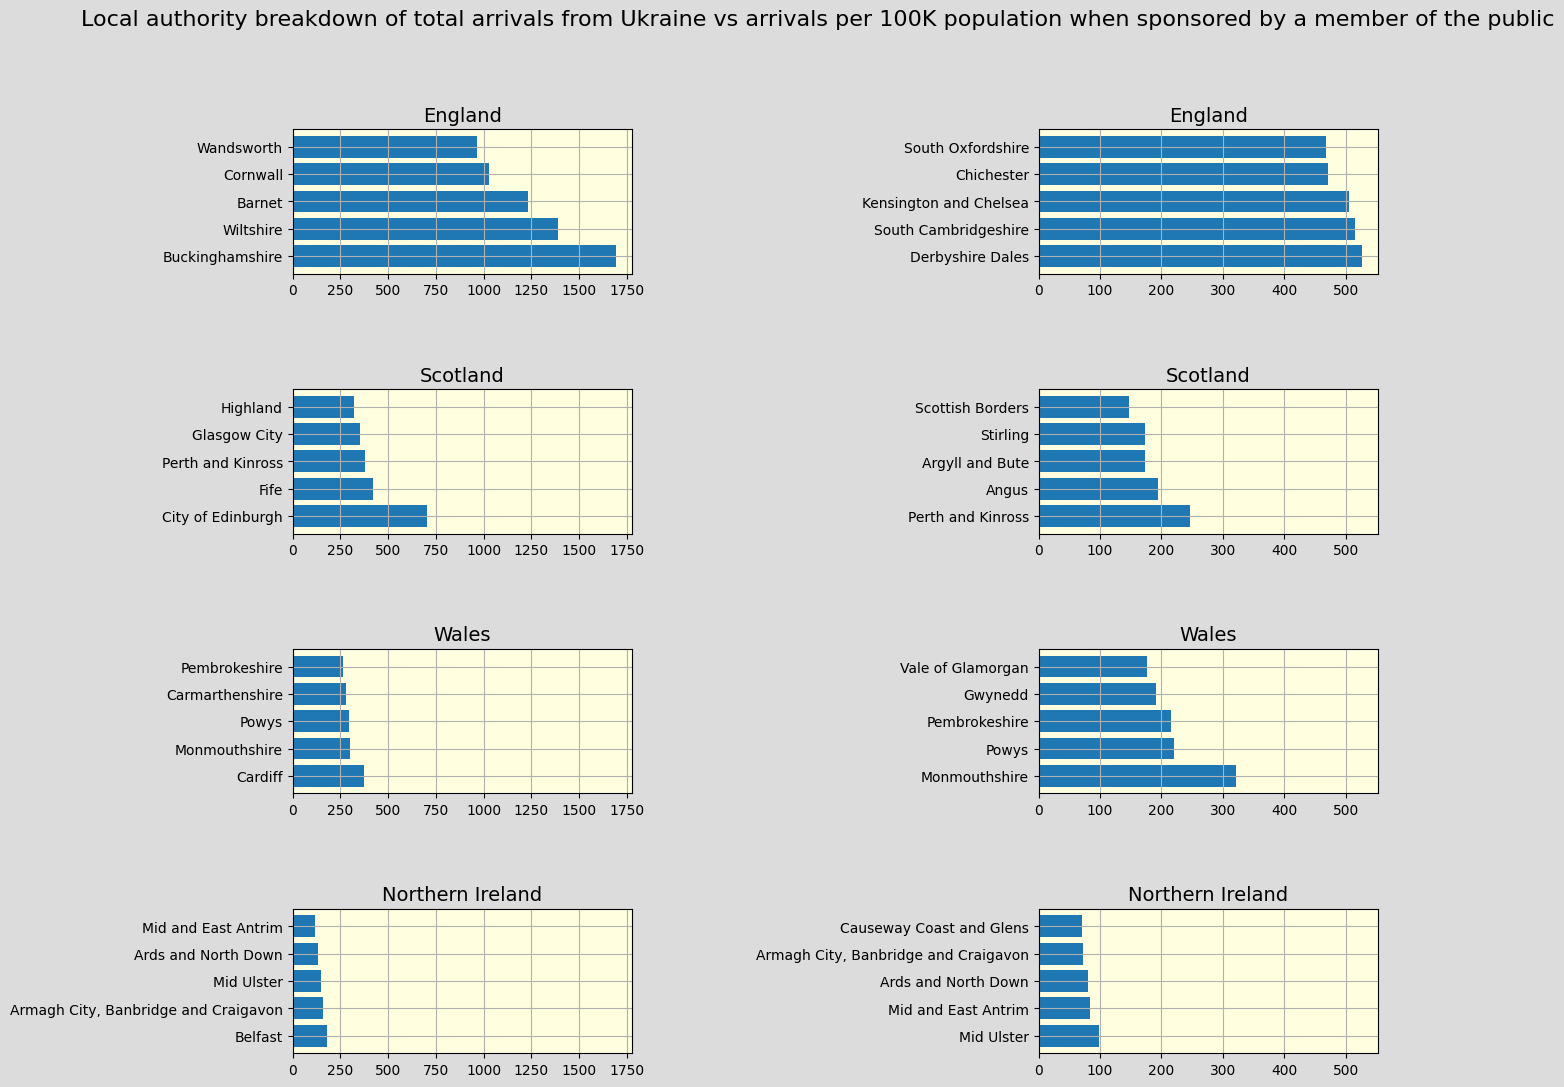

In [172]:
county_population = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/ukpopestimatesmid2021on2021geographyfinal.xls', sheet_name = 'MYE2 - Persons', skiprows=7)
county_df = county_population[['Code', 'All ages']]
county_df = county_df.rename(columns={'Code': 'ONS code'})
county_joined = members_of_public.join(county_df.set_index('ONS code'), on='ONS code', how='inner')
county_joined = county_joined.rename(columns={'All ages': 'Population'})
county_joined['Arrivals per 100K'] = round(county_joined['Arrivals']/county_joined['Population']*100000).astype(int)
xe = county_joined[county_joined['Country'] == 'England'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
ye = county_joined[county_joined['Country'] == 'England'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
xs = county_joined[county_joined['Country'] == 'Scotland'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
ys = county_joined[county_joined['Country'] == 'Scotland'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
xw = county_joined[county_joined['Country'] == 'Wales'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
yw = county_joined[county_joined['Country'] == 'Wales'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
xi = county_joined[county_joined['Country'] == 'Northern Ireland'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
yi = county_joined[county_joined['Country'] == 'Northern Ireland'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
x1 = members_of_public[members_of_public['Country'] == 'England'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y1 = members_of_public[members_of_public['Country'] == 'England'].sort_values('Arrivals', ascending=False).head()['Arrivals']
x2 = members_of_public[members_of_public['Country'] == 'Scotland'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y2 = members_of_public[members_of_public['Country'] == 'Scotland'].sort_values('Arrivals', ascending=False).head()['Arrivals']
x3 = members_of_public[members_of_public['Country'] == 'Wales'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y3 = members_of_public[members_of_public['Country'] == 'Wales'].sort_values('Arrivals', ascending=False).head()['Arrivals']
x4 = members_of_public[members_of_public['Country'] == 'Northern Ireland'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y4 = members_of_public[members_of_public['Country'] == 'Northern Ireland'].sort_values('Arrivals', ascending=False).head()['Arrivals']
fig, axs = plt.subplots(4,2, sharex='col', figsize=(14,12), facecolor='gainsboro')
fig.subplots_adjust(hspace=0.8, wspace=1.2)
fig.suptitle('Local authority breakdown of total arrivals from Ukraine vs arrivals per 100K population when sponsored by a member of the public', fontsize=16)
axs[0,1].barh(xe, ye)
axs[0,1].set_title('England', fontsize=14)
axs[0,1].xaxis.set_tick_params(labelbottom=True)
axs[0,1].grid()
axs[0,1].set_facecolor('lightyellow')
axs[1,1].barh(xs, ys)
axs[1,1].set_title('Scotland', fontsize=14)
axs[1,1].xaxis.set_tick_params(labelbottom=True)
axs[1,1].grid()
axs[1,1].set_facecolor('lightyellow')
axs[2,1].barh(xw, yw)
axs[2,1].set_title('Wales', fontsize=14)
axs[2,1].xaxis.set_tick_params(labelbottom=True)
axs[2,1].grid()
axs[2,1].set_facecolor('lightyellow')
axs[3,1].barh(xi, yi)
axs[3,1].set_title('Northern Ireland', fontsize=14)
axs[3,1].xaxis.set_tick_params(labelbottom=True)
axs[3,1].grid()
axs[3,1].set_facecolor('lightyellow')
axs[0,0].barh(x1, y1)
axs[0,0].set_title('England', fontsize=14)
axs[0,0].xaxis.set_tick_params(labelbottom=True)
axs[0,0].grid()
axs[0,0].set_facecolor('lightyellow')
axs[1,0].barh(x2, y2)
axs[1,0].set_title('Scotland', fontsize=14)
axs[1,0].xaxis.set_tick_params(labelbottom=True)
axs[1,0].grid()
axs[1,0].set_facecolor('lightyellow')
axs[2,0].barh(x3,y3)
axs[2,0].set_title('Wales', fontsize=14)
axs[2,0].xaxis.set_tick_params(labelbottom=True)
axs[2,0].grid()
axs[2,0].set_facecolor('lightyellow')
axs[3,0].barh(x4,y4)
axs[3,0].grid()
axs[3,0].set_title('Northern Ireland', fontsize=14)
axs[3,0].xaxis.set_tick_params(labelbottom=True)
axs[3,0].set_facecolor('lightyellow')



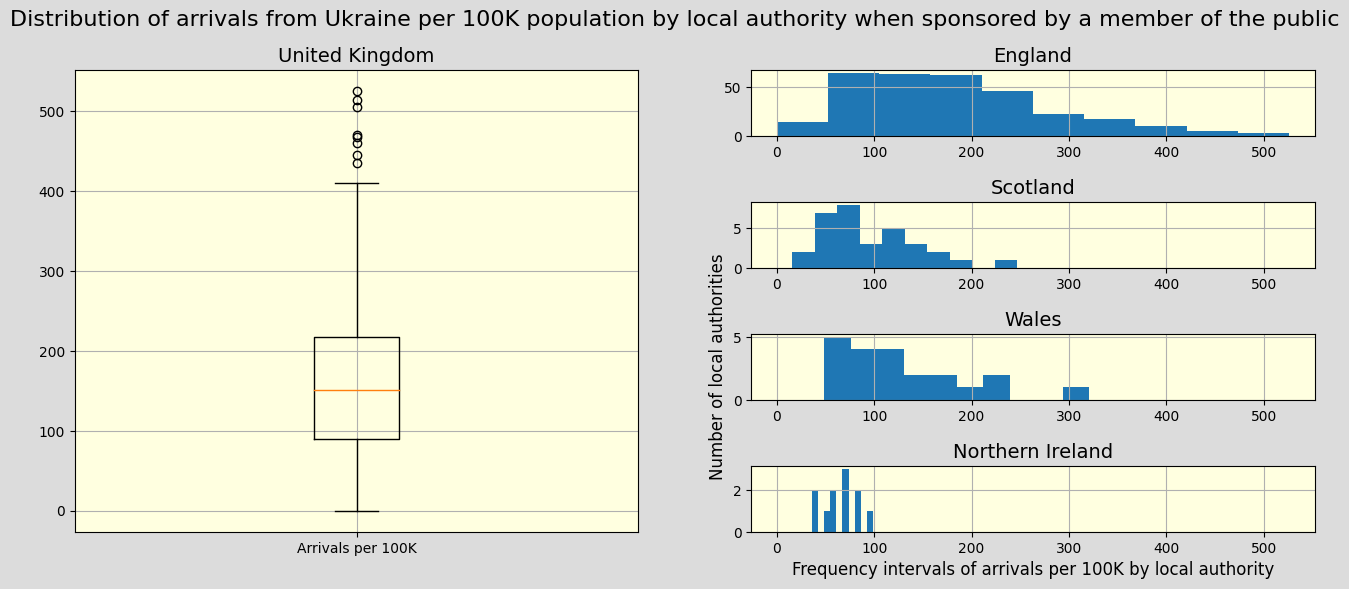

In [164]:
e = county_joined[county_joined['Country'] == 'England']['Arrivals per 100K']
s = county_joined[county_joined['Country'] == 'Scotland']['Arrivals per 100K']
w = county_joined[county_joined['Country'] == 'Wales']['Arrivals per 100K']
i = county_joined[county_joined['Country'] == 'Northern Ireland']['Arrivals per 100K']
fig = plt.figure(facecolor='gainsboro')
fig.set_figheight(6)
fig.set_figwidth(16)
fig.subplots_adjust(hspace=1)
fig.suptitle('Distribution of arrivals from Ukraine per 100K population by local authority when sponsored by a member of the public', fontsize=16)
ax1 = plt.subplot2grid(shape=(4, 2), loc=(0, 1))
ax2 = plt.subplot2grid(shape=(4, 2), loc=(1, 1), sharex=ax1)
ax3 = plt.subplot2grid(shape=(4, 2), loc=(2, 1), sharex=ax1)
ax4 = plt.subplot2grid(shape=(4, 2), loc=(3, 1), sharex=ax1)
ax5 = plt.subplot2grid(shape=(4, 2), loc=(0, 0), rowspan=4)
ax1.hist(e)
ax1.set_title('England', fontsize=14)
ax1.xaxis.set_tick_params(labelbottom=True)
ax1.grid()
ax1.set_facecolor('lightyellow')
ax2.hist(s)
ax2.xaxis.set_tick_params(labelbottom=True)
ax2.set_title('Scotland', fontsize=14)
ax2.grid()
ax2.set_facecolor('lightyellow')
ax3.hist(w)
ax3.set_title('Wales', fontsize=14)
ax3.xaxis.set_tick_params(labelbottom=True)
ax3.set_ylabel('Number of local authorities', fontsize=12)
ax3.grid()
ax3.set_facecolor('lightyellow')
ax4.hist(i)
ax4.set_title('Northern Ireland', fontsize=14)
ax4.xaxis.set_tick_params(labelbottom=True)
ax4.set_xlabel('Frequency intervals of arrivals per 100K by local authority', fontsize=12)
ax4.grid()
ax4.set_facecolor('lightyellow')
ax5.boxplot(county_joined['Arrivals per 100K'], labels=['Arrivals per 100K'])
ax5.set_title('United Kingdom', fontsize=14)
ax5.grid()
ax5.set_facecolor('lightyellow')



Text(0.5, 1.0, 'Income deprivation vs arrivals from Ukraine per 100K population \n when sponsored by members of the public in England')

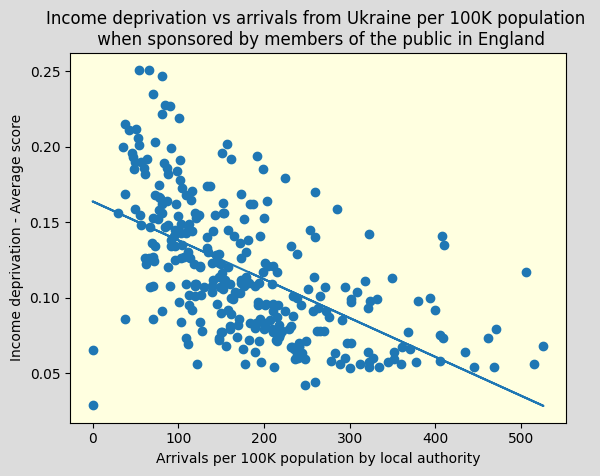

In [168]:
deprivation_e = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/localincomedeprivationdata.xlsx', sheet_name='Local authorities')
deprivation_e = deprivation_e.rename(columns = {'Local Authority District code (2019)': 'ONS code'})
deprivation_e = county_joined.join(deprivation_e.set_index('ONS code'), on ='ONS code', how='inner')
ave_score = deprivation_e['Income deprivation- Average score ']
arrivals_100K = deprivation_e['Arrivals per 100K']
fig, axs = plt.subplots(facecolor='gainsboro')
plt.scatter(arrivals_100K, ave_score)
plt.ylabel('Income deprivation - Average score')
plt.xlabel('Arrivals per 100K population by local authority')
axs.set_facecolor('lightyellow')
r = linregress(arrivals_100K, ave_score)
s = r.slope
inter = r.intercept
plt.plot(arrivals_100K, s*arrivals_100K+inter)
plt.title('Income deprivation vs arrivals from Ukraine per 100K population \n when sponsored by members of the public in England')



/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


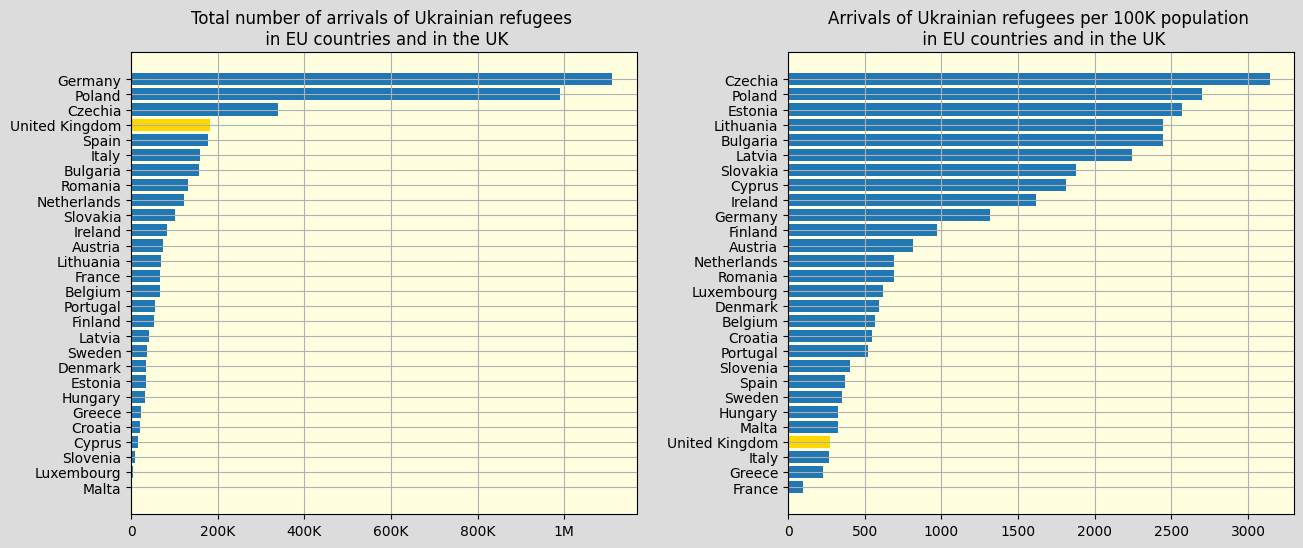

In [167]:
eu_population = pd.read_csv('https://raw.githubusercontent.com/yuliiabosher/Python-with-Data-course/main/Population-by-country-2023.csv')
ukr_in_eu = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/migr_asytpsm_page_spreadsheet.xlsx', sheet_name = 'Sheet 1', skiprows=10)
ukr_in_eu = ukr_in_eu.drop(ukr_in_eu.loc[29:].index)
ukr_in_eu = ukr_in_eu.drop(ukr_in_eu.loc[:1].index)
ukr_in_eu = ukr_in_eu.rename(columns = {'TIME': 'Country', '2023-05': 'Arrivals from Ukraine'})
ukr_in_eu = ukr_in_eu[['Country', 'Arrivals from Ukraine']]
ukr_in_eu['Arrivals from Ukraine'] = ukr_in_eu['Arrivals from Ukraine'].astype(int)
eu_population = eu_population.rename(columns = {'Population on 1 January - total': 'Population', 'Category': 'Country'})
ukr_eu = eu_population.join(ukr_in_eu.set_index('Country'), on='Country')
ukr_eu['Arrivals from Ukraine per 100K'] = ukr_eu['Arrivals from Ukraine']/ukr_eu['Population']*100000
ukr_eu['Arrivals from Ukraine per 100K'] = ukr_eu['Arrivals from Ukraine per 100K'].astype(int)
uk_100K = int(uk['Arrivals'].sum()/county_joined['Population'].sum()*100000)
uk_row = {'Country': ['United Kingdom'], 'Population': [county_joined['Population'].sum()], 'Arrivals from Ukraine': [uk['Arrivals'].sum()], 'Arrivals from Ukraine per 100K': [uk_100K]}
uk_row_df = pd.DataFrame(uk_row)
uk_eu = pd.concat([ukr_eu, uk_row_df], ignore_index=True)
uk_eu1 = uk_eu.sort_values('Arrivals from Ukraine per 100K')
fig, axs = plt.subplots(1,2, figsize=(15,6), facecolor='gainsboro')
fig.subplots_adjust(wspace=0.3)

for n,i in uk_eu1.iterrows():
  if i["Country"] == "United Kingdom":
    axs[1].barh(i['Country'], i['Arrivals from Ukraine per 100K'], color='gold')
  else:
    axs[1].barh(i['Country'], i['Arrivals from Ukraine per 100K'], color='tab:blue')
axs[1].set_title('Arrivals of Ukrainian refugees per 100K population \n in EU countries and in the UK')
axs[1].grid()
uk_eu2 = uk_eu.sort_values('Arrivals from Ukraine')
for n,i in uk_eu2.iterrows():
  if i["Country"] == "United Kingdom":
    axs[0].barh(i['Country'], i['Arrivals from Ukraine'], color='gold')
  else:
    axs[0].barh(i['Country'], i['Arrivals from Ukraine'], color='tab:blue')
axs[0].set_title('Total number of arrivals of Ukrainian refugees \n in EU countries and in the UK')
axs[0].grid()
axs[0].ticklabel_format(style='plain', axis='x')
uk_eu2
def millions(x, pos):
  if x==0:
    return 0
  elif x>=1000000:
    return f'{str(int(x))[:1]}M'
  else:
    return f'{str(int(x))[:3]}K'

axs[0].xaxis.set_major_formatter(FuncFormatter(millions))
axs[0].set_facecolor('lightyellow')
axs[1].set_facecolor('lightyellow')


